In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = 'YOUR KEY HERE'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

#Age of Inventory: Each Wednesday, age of inventory is calculated as the 
#median number of days all active listings as of that Wedne

df = get_data(['M9_MRPFAH', 'M9_MSPFAH', 'M9_MLPFAH', 'M9_MRPAH'])
df = df.rename(columns={"M9_MRPFAH": "Median Rent Price Per Sqft", 
                        "M9_MSPFAH": "Median Sold Price Per Sqft", 
                        "M9_MLPFAH": "Median List Price Per Sqft", 
                        "M9_MRPAH": "Median Rent Price"})

drop_na_df = df.dropna()
drop_na_df.head()

,Median Rent Price Per Sqft,Median Sold Price Per Sqft,Median List Price Per Sqft,Median Rent Price
Date,,,,
2010-01-31,0.727402,83.6435,93.546798,1012.5
2010-02-28,0.716958,80.8857,93.266667,1150.0
2010-03-31,0.716958,78.0938,93.991737,1195.0
2010-04-30,0.722383,79.9646,94.437564,1200.0
2010-05-31,0.722983,82.2230,93.065811,1200.0


In [3]:
X = drop_na_df[["Median Rent Price Per Sqft",
                "Median Sold Price Per Sqft",
                "Median List Price Per Sqft"]]
y = drop_na_df["Median Rent Price"].values.reshape(-1, 1)
X.head()

,Median Rent Price Per Sqft,Median Sold Price Per Sqft,Median List Price Per Sqft
Date,,,
2010-01-31,0.727402,83.6435,93.546798
2010-02-28,0.716958,80.8857,93.266667
2010-03-31,0.716958,78.0938,93.991737
2010-04-30,0.722383,79.9646,94.437564
2010-05-31,0.722983,82.2230,93.065811


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

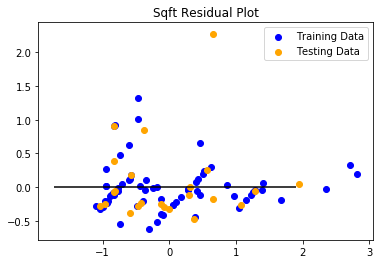

In [6]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Sqft Residual Plot")
plt.savefig('SqftResidualPlot.png')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3465646443506312, R2: 0.6114347993692942


# When all three are compared, there is less correlation between Rent, List and Sold prices per Sqft.